In [1]:
# load the data

import pandas as pd

acad_data = pd.read_csv('DBS.csv')
acad_data.head()

,access;tests;tests_grade;exam;project;project_grade;assignments;result_points;result_grade;graduate;year;acad_year
0,1256;57;A;19;91.54;A;40;189.92;A;1;2019;2019/2020
1,985;42.87;B;19;75.96;A;13.7;189.43;A;1;2017;20...
2,1455;54.5;A;16;96.79;A;40;188.91;A;1;2019;2019...
3,998;54.5;A;16;93.36;A;40;186.85;A;1;2019;2019/...
4,1347;55;A;16;92.86;A;39;186.38;A;1;2019;2019/2020


In [2]:
acad_data[['access','tests','tests_grade','exam','project','project_grade','assignments','result_points',
    'result_grade','graduate','year','acad_year']] = acad_data['access;tests;tests_grade;exam;project;project_grade;assignments;result_points;result_grade;graduate;year;acad_year'].str.split(';', expand=True)

In [3]:
acad_data = acad_data.drop(['access;tests;tests_grade;exam;project;project_grade;assignments;result_points;result_grade;graduate;year;acad_year'],axis=1)
acad_data

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57,A,19,91.54,A,40,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.5,A,16,96.79,A,40,188.91,A,1,2019,2019/2020
3,998,54.5,A,16,93.36,A,40,186.85,A,1,2019,2019/2020
4,1347,55,A,16,92.86,A,39,186.38,A,1,2019,2019/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
256,340,0,FX,0,0,FX,0,0,FX,0,2016,2016/2017
257,429,0,FX,0,0,FX,0,0,FX,0,2016,2016/2017
258,26,0,FX,0,0,FX,0,0,FX,0,2018,2018/2019
259,126,0,FX,0,0,FX,0,0,FX,0,2018,2018/2019


The educational data used in this project represents 261 unique students enrolled in the e-learning course over four academic years. The course used as the primary source of data contained 13 sections with more than 30 interactive activities, which required continual students’activity. These activities could be divided into assignments, tests, project, and exam.

Interpretation of some features:

Access: represent the total number of course views by a student in the observed period.
Assignments: represent a total score from different types of evaluated activities within the observed period.
Tests: represent a total score from the midterm and final tests during the semester.
Project: a total score from the final project.
result_points: represents the total sum of partial points, which the student could get during the course.

In [4]:
acad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   access         261 non-null    object
 1   tests          261 non-null    object
 2   tests_grade    261 non-null    object
 3   exam           261 non-null    object
 4   project        261 non-null    object
 5   project_grade  261 non-null    object
 6   assignments    261 non-null    object
 7   result_points  261 non-null    object
 8   result_grade   261 non-null    object
 9   graduate       261 non-null    object
 10  year           261 non-null    object
 11  acad_year      261 non-null    object
dtypes: object(12)
memory usage: 24.6+ KB


In [5]:
acad_data.describe()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
count,261,261,261,261,261,261,261,261,261,261,261,261
unique,227,162,7,17,202,7,116,241,6,2,4,4
top,323,0,E,0,0,A,40,190,C,1,2018,2018/2019
freq,2,17,58,45,42,106,22,8,70,210,74,74


In [6]:
for col in acad_data.columns:
    print('\nUnique values of',col, 'are : ',acad_data[col].unique(), "\nand Number of Unique values:",
              len(acad_data[col].unique()))
        


Unique values of access are :  ['1256' '985' '1455' '998' '1347' '1000' '1216' '737' '782' '799' '1506'
 '776' '699' '615' '1065' '482' '459' '592' '779' '619' '738' '2392' '595'
 '424' '1047' '930' '1275' '349' '697' '359' '1085' '457' '620' '701'
 '816' '969' '841' '945' '2089' '912' '680' '1537' '1757' '616' '630'
 '1081' '1054' '674' '1354' '978' '849' '712' '1056' '2135' '936' '967'
 '426' '442' '696' '485' '973' '513' '561' '1084' '1053' '925' '515' '466'
 '498' '275' '397' '172' '1470' '768' '649' '625' '598' '623' '843' '433'
 '723' '583' '577' '411' '504' '614' '383' '469' '1197' '1153' '708'
 '1664' '521' '682' '736' '472' '1162' '893' '1118' '777' '1021' '810'
 '464' '556' '815' '520' '1039' '1111' '496' '941' '352' '710' '659'
 '1265' '676' '772' '379' '570' '475' '487' '558' '501' '534' '306' '863'
 '439' '582' '319' '305' '303' '384' '666' '375' '668' '905' '405' '500'
 '1941' '429' '518' '997' '1583' '1046' '1311' '837' '403' '512' '1292'
 '575' '792' '519' '1043' '1167

# EDA

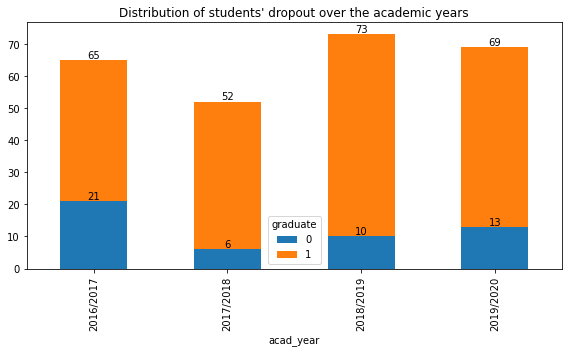

In [38]:
import matplotlib.pyplot as plt

ax = acad_data.groupby(['acad_year','graduate'])['access'].count().unstack().plot(kind='bar',stacked=True,
                                                                                  figsize=(8, 5))
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
#plt.subplots()
plt.title("Distribution of students' dropout over the academic years")
plt.tight_layout()


In [46]:
# change the dtype of numerical columns

acad_data[['access','tests','project','assignments','result_points']]=acad_data[['access',
                                                    'tests','project','assignments','result_points']].astype(float)

C:\Users\B590\AppData\Local\Temp\ipykernel_10124\2715135247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acad_data[['access','tests','project','assignments','result_points']]=acad_data[['access','tests','project','assignments','result_points']].astype(float)


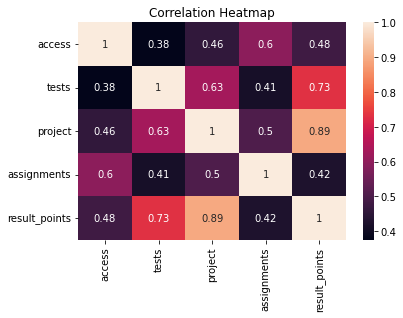

In [47]:
import seaborn as sns

sns.heatmap(acad_data[['access','tests','project','assignments','result_points']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

The variables project and tests have a slightly stronger correlation with result_points than the other variables.